# The Machine Learning Group Challenge!

##  Today's Mission
- Your objective is to devise the best possible model to predict successful/default loans using a preprocessed version of the Lending Club loan dataset.

- Class into divided into 4 groups.

- The training data is 13689 loans labeled either as 1 (successful) or 0 (default). Comes with 30 categorical and numerical features. The testing data is also 13689 loans.

- A data dictionary file is included as well. It is a table explaining each what each feature means.

- Groups will judged on how much money their model makes. You will evaluate your model on the testing dataset. You cannot used testing data to train a model.

- Your profit will be determined by the amount of money you make from correctly predicting good loans (loan amount * interest rate/100.) subtracted by the money you lose from incorrectly predicting bad loans as good (-loan amount). I have given a function to calculate that.

- Finding the correct probability threshold will be super key in determing how much money you make.

- **VERY IMPORTANT:** You must transform your testing the data the same way you did your training data. So make sure you have the same columns in the same order.
        
- Stewart and I will be on be hand for guidance. However I want you to primarily use your teammates for help. 

- Use all the tools at your disposal, try all the models we've learned in class. Refer to past class notebooks for help. Be sure to use modeling evaluating techniques such as ROC curves, confusion matrix, recall/precision, etc.

- To optimize model, find the right combination of features and the right model with the right parameters. Get creative!

- Remember to use your time wisely, it will go by fast. Communicate amongst yourselves often.
   

### Online resources on Lending Club loan data
Kaggle Page: https://www.kaggle.com/wendykan/lending-club-loan-data. Make sure to check out the kernels section.

Y Hat tutorial (It's in R, but its still useful): http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html

Blog tutorial on the data from Kevin Davenport: http://kldavenport.com/lending-club-data-analysis-revisted-with-python/



### Class Time
No class breaks. But individual breaks are allowed of course.

- 6:30 - 7:00
    - Feature engineering/selection: make dummy variables, dropping features, scaling, and other methods of transforming data. 
    - Exploratory data analysis aka get to know your features time.
    
    
- 7:00 - 8:45
    - Modeling time!!
    
    
- 8:45 - 9:25
    - Model testing.
    
    
- 9:25 - 9:30
    - Winner decision. Exit tickets.

In [13]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import validation_curve, learning_curve

In [14]:
# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
train = pd.read_csv("../../data/lending_club/challenge_training_data.csv")
train.head(2)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,RENT,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,OWN,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0


In [15]:
#Load in data dictionary
data_dict = pd.read_csv("../../data/lending_club/the_data_dictionary.csv")
data_dict

,dtypes,name,description
0,object,id,A unique LC assigned ID for the loan listing.
1,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
2,float64,funded_amnt,The total amount committed to that loan at that point in time.
3,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,object,int_rate,Interest Rate on the loan
5,float64,installment,The monthly payment owed by the borrower if the loan originates.
6,object,grade,LC assigned loan grade
7,object,emp_title,The job title supplied by the Borrower when applying for the loan.*
8,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
9,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...


In [16]:
train2 = train.drop(["id","emp_title","desc","purpose","title"], axis = 1)
train2.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,3150.0,3150.0,36 months,10.99%,103.12,B,9 years,RENT,15300.0,Verified,1,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,10000.0,10000.0,36 months,7.51%,311.11,A,4 years,OWN,125000.0,Not Verified,1,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0
2,11000.0,11000.0,36 months,12.53%,368.13,B,3 years,RENT,81600.0,Not Verified,1,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5%,10.0,Feb-2017,0.0,0.0,0.0
3,2200.0,2200.0,36 months,13.49%,74.65,C,5 years,OWN,80000.0,Verified,1,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7%,6.0,Sep-2011,0.0,0.0,0.0
4,4500.0,4500.0,36 months,13.22%,152.11,C,4 years,RENT,30555.0,Not Verified,1,4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7%,14.0,Feb-2017,0.0,0.0,0.0


In [17]:
percents = ['int_rate', 'revol_util']

def percent_cleaner(x):
    """
    Convert percent values (e.g. 22%) to float (e.g. 22.0); must be strings for replace() to work
    """
    x = x.replace('< 10%', '5%')
    x = x.replace('%', '')
    try:
        return float(x)
    except:
        return np.nan

In [20]:
train2.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,tax_liens
count,13689.000000,13689.000000,13689.000000,13689.000000,1.368900e+04,13689.000000,13689.000000,13689.000000,13689.000000,13689.000000,13689.000000,13689.000000,13689.00000,13689.000000,13689.000000,13689.000000,13689.0,13689.0,13689.000000
mean,11364.750895,11085.603404,12.237053,332.900659,6.979179e+04,0.792169,13.489158,0.151143,712.332530,716.332530,1.154869,9.478267,0.05793,14934.617357,49.321753,22.224706,0.0,0.0,0.000073
std,7259.133486,7011.722526,3.594810,207.102750,5.787344e+04,0.405770,6.743814,0.499875,35.851729,35.851729,1.657204,4.491987,0.24342,22599.094015,28.355361,11.556404,0.0,0.0,0.008547
min,500.000000,500.000000,5.420000,15.760000,3.600000e+03,0.000000,0.000000,0.000000,610.000000,614.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.0,0.0,0.000000
25%,6000.000000,5950.000000,9.760000,173.860000,4.157900e+04,1.000000,8.340000,0.000000,685.000000,689.000000,0.000000,6.000000,0.00000,3885.000000,25.900000,14.000000,0.0,0.0,0.000000
50%,10000.000000,10000.000000,12.180000,291.930000,6.000000e+04,1.000000,13.600000,0.000000,710.000000,714.000000,1.000000,9.000000,0.00000,9198.000000,49.800000,20.000000,0.0,0.0,0.000000
75%,15000.000000,15000.000000,14.610000,444.790000,8.300000e+04,1.000000,18.830000,0.000000,735.000000,739.000000,2.000000,12.000000,0.00000,17819.000000,73.100000,29.000000,0.0,0.0,0.000000
max,35000.000000,35000.000000,24.400000,1288.100000,2.039784e+06,1.000000,29.990000,11.000000,825.000000,829.000000,28.000000,47.000000,3.00000,508961.000000,119.000000,90.000000,0.0,0.0,1.000000


In [18]:
for per_col in percents:
        train2[per_col] = train2[per_col].astype('str')
        train2[per_col] = train2[per_col].map(percent_cleaner)


In [19]:
train2.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,3150.0,3150.0,36 months,10.99,103.12,B,9 years,RENT,15300.0,Verified,1,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4,9.0,Feb-2014,0.0,0.0,0.0
1,10000.0,10000.0,36 months,7.51,311.11,A,4 years,OWN,125000.0,Not Verified,1,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9,40.0,Feb-2017,0.0,0.0,0.0
2,11000.0,11000.0,36 months,12.53,368.13,B,3 years,RENT,81600.0,Not Verified,1,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5,10.0,Feb-2017,0.0,0.0,0.0
3,2200.0,2200.0,36 months,13.49,74.65,C,5 years,OWN,80000.0,Verified,1,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7,6.0,Sep-2011,0.0,0.0,0.0
4,4500.0,4500.0,36 months,13.22,152.11,C,4 years,RENT,30555.0,Not Verified,1,4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7,14.0,Feb-2017,0.0,0.0,0.0


In [21]:
corr = train2.corr()

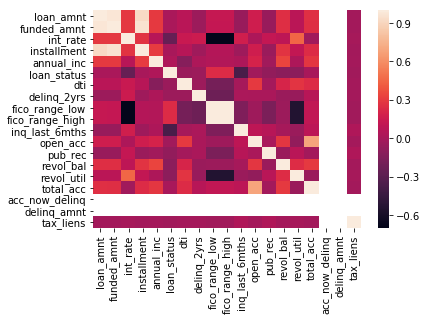

In [22]:
sb.heatmap(corr)

In [23]:
train_new = train[['loan_amnt','int_rate','grade','annual_inc','dti','fico_range_high','inq_last_6mths','revol_bal',
'revol_util']]
train_new.shape

(13689, 9)

In [26]:
train_new.head()

,loan_amnt,int_rate,grade,annual_inc,dti,fico_range_high,inq_last_6mths,revol_bal,revol_util
0,3150.0,10.99,B,15300.0,19.76,699.0,0.0,9316.0,76.4
1,10000.0,7.51,A,125000.0,18.43,804.0,1.0,25364.0,2.9
2,11000.0,12.53,B,81600.0,5.12,729.0,2.0,358.0,7.5
3,2200.0,13.49,C,80000.0,3.27,704.0,0.0,10142.0,95.7
4,4500.0,13.22,C,30555.0,4.32,694.0,1.0,3371.0,88.7


In [25]:
for per_col in percents:
        train_new[per_col] = train_new[per_col].astype('str')
        train_new[per_col] = train_new[per_col].map(percent_cleaner)

C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
grade_dummies = pd.get_dummies(train_new.grade, prefix = 'grade_')
grade_dummies.drop(['grade__B'], axis = 1, inplace = True)
train_new.drop(['grade'], axis = 1, inplace = True)
train_new = pd.concat([train_new, grade_dummies], axis = 1)
train_new.head()

C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,loan_amnt,int_rate,annual_inc,dti,fico_range_high,inq_last_6mths,revol_bal,revol_util,grade__A,grade__C,grade__D,grade__E,grade__F,grade__G
0,3150.0,10.99,15300.0,19.76,699.0,0.0,9316.0,76.4,0,0,0,0,0,0
1,10000.0,7.51,125000.0,18.43,804.0,1.0,25364.0,2.9,1,0,0,0,0,0
2,11000.0,12.53,81600.0,5.12,729.0,2.0,358.0,7.5,0,0,0,0,0,0
3,2200.0,13.49,80000.0,3.27,704.0,0.0,10142.0,95.7,0,1,0,0,0,0
4,4500.0,13.22,30555.0,4.32,694.0,1.0,3371.0,88.7,0,1,0,0,0,0


In [36]:
X = train_new
y = train.loan_status

model = DecisionTreeClassifier(max_depth=10)

model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
model.score(X, y)

0.87537438819490099

In [38]:
#Load in test data when you're ready 
test = pd.read_csv("../../data/lending_club/challenge_testing_data.csv")

In [39]:
test_new = test[['loan_amnt','int_rate','grade','annual_inc','dti','fico_range_high','inq_last_6mths','revol_bal',
'revol_util']]
test_new.shape

(13689, 9)

In [40]:
for per_col in percents:
        test_new[per_col] = test_new[per_col].astype('str')
        test_new[per_col] = test_new[per_col].map(percent_cleaner)

C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
grade_dummies = pd.get_dummies(test_new.grade, prefix = 'grade_')
grade_dummies.drop(['grade__B'], axis = 1, inplace = True)
test_new.drop(['grade'], axis = 1, inplace = True)
test_new = pd.concat([test_new, grade_dummies], axis = 1)
test_new.head()

C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,loan_amnt,int_rate,annual_inc,dti,fico_range_high,inq_last_6mths,revol_bal,revol_util,grade__A,grade__C,grade__D,grade__E,grade__F,grade__G
0,2500.0,15.27,30000.0,1.00,744.0,5.0,1687.0,9.4,0,1,0,0,0,0
1,10000.0,13.49,49200.0,20.00,694.0,1.0,5598.0,21.0,0,1,0,0,0,0
2,3000.0,18.64,48000.0,5.35,664.0,2.0,8221.0,87.5,0,0,0,1,0,0
3,5375.0,12.69,15000.0,18.08,729.0,0.0,9279.0,36.5,0,0,0,0,0,0
4,3000.0,9.91,15000.0,12.56,709.0,2.0,7323.0,43.1,0,0,0,0,0,0


In [97]:


X_train =  train_new
X_test = test_new
y_train = train.loan_status
y_test = test.loan_status

#fit default model on the training set
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

#Evaluate model on training data
model.score(X_train, y_train)


0.86507414712542918

In [98]:
model.score(X_test, y_test)

0.854043392504931

In [99]:
#Call cross_val_score, input empty DT model, X, y, set cv = 5 and scoring = accuracy
cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=10), X, y, cv = 5, scoring = "accuracy")

#Call cv_scores
cv_scores

array([ 0.85500365,  0.84441198,  0.8568298 ,  0.86121256,  0.85860431])

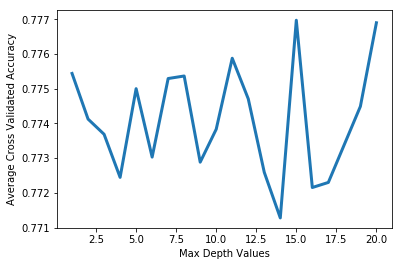

In [83]:
depths = range(1,21)
cv_scores = []

for depth in depths:
    cv = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5, scoring = "accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");


In [114]:
prob_preds = model.predict_proba(X_test)[:,1]
prob_preds

array([ 0.        ,  0.85594947,  0.77618924, ...,  0.        ,
        0.        ,  0.9391069 ])

In [123]:
d ={"loan_amnt":X_test.loan_amnt,
    "int_rate":X_test.int_rate,
   "predict_prob":prob_preds,
   "target":y_test}

In [124]:
prob_df = pd.DataFrame(d)
prob_df.head()

,int_rate,loan_amnt,predict_prob,target
0,15.27,2500.0,0.000000,0
1,13.49,10000.0,0.855949,1
2,18.64,3000.0,0.776189,1
3,12.69,5375.0,0.855949,0
4,9.91,3000.0,0.939107,1


In [147]:
prob_df['predicted'] = threshold(prob_df.predict_prob, 0.93)
prob_df.head()

,int_rate,loan_amnt,predict_prob,target,predicted
0,15.27,2500.0,0.000000,0,0
1,13.49,10000.0,0.855949,1,0
2,18.64,3000.0,0.776189,1,0
3,12.69,5375.0,0.855949,0,0
4,9.91,3000.0,0.939107,1,1


In [143]:


thresh_range = np.linspace(.9, 1, 20)

costs = []
for thresh in thresh_range:
    prob_df['predicted'] = threshold(prob_df.predict_prob, thresh)
    net_cost = prob_df.apply(profit_function, axis =1)
    costs.append(net_cost.sum())




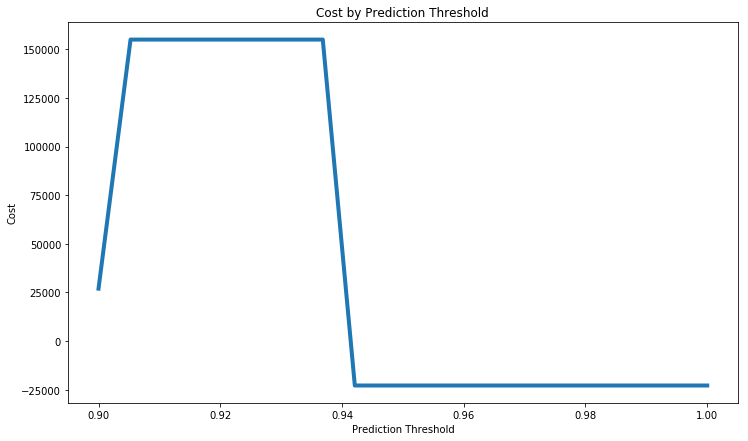

In [144]:
plt.figure(figsize = (12, 7))
plt.plot(thresh_range, costs, linewidth = 4)
plt.xlabel('Prediction Threshold')
plt.ylabel('Cost')
plt.title('Cost by Prediction Threshold')
#plt.ylim((.4, .75))
plt.show()

In [148]:
profit_series = prob_df.apply(profit_function, axis = 1)
profit_series.sum()

154996.11999999871

Here is the threshold function. Input your probabilities for class 1 and set a probability threshold of your choice. The default threshold is 0.5. The output will be 1's and 0s, 1 values for all the values that are greater or equal to your predetermined threshold value.

In [118]:

def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

This is the profit function. It takes in a dataframe with the loan_amnt, int_rate, target variable, and class predictions values.

- It first checks to see if a row has 0 in the outcome column and 1 in the predicted (false positive) and returns the negative value of the loan_amnt. This is how much money you lost for loans that mean that condition.

- Then it checks for true positives, meaning conditions where both the target and predicted values equal 1, then return the loan_amnt times the int_rate divided by 100. This is how much money you made from loans that meet this condition.

- Everything else gets a zero.

In [140]:
def profit_function(data):
    if data.target == 0 and data.predicted == 1:
        return -1 *data.loan_amnt
    elif data.target == 1 and data.predicted == 1:
        return data.loan_amnt * (data.int_rate/100.)
    else:
        return 0

Here's an example of using the threshold and profit_functions

In [120]:
#List of probabilities
#probs = np.array([0.2, 0.5, 0.8, 0.9, 0.1, 0.75])

#Pass in probabilities into threshold function, using .7 as threshold
preds = threshold(probs, thres=.7)
preds

array([[1, 0],
       [0, 1],
       [0, 1],
       ..., 
       [1, 0],
       [1, 0],
       [0, 1]])

In [94]:
sample_df = {"loan_amnt": [1000, 500, 200, 5000, 3000, 6000],
            "int_rate": [18, 20, 4, 5, 2, 10], 
            "target": [0, 1, 0, 1, 0, 1]}

#Put dictionary in data frame

profit_df = pd.DataFrame(sample_df)

profit_df

,int_rate,loan_amnt,target
0,18,1000,0
1,20,500,1
2,4,200,0
3,5,5000,1
4,2,3000,0
5,10,6000,1


In [121]:
#Add in predictions

profit_df["predicted"] = preds
profit_df

ValueError: Length of values does not match length of index

In [11]:
#Apply function onto data frame
profit_series = profit_df.apply(profit_function, axis = 1)
profit_series

0      0.0
1      0.0
2   -200.0
3    250.0
4      0.0
5    600.0
dtype: float64

In [12]:
#Sum up profits and losses
profit_series.sum()

650.0

This model made $650

## Let the games begin!!